In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = torch.linspace(0,799,800)

In [3]:
x

tensor([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
         24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
         36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
         48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
         60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
         72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
         84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
         96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 107.,
        108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
        120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
        144., 145., 146., 147., 148., 14

In [8]:
y = torch.sin(x*2*3.1416/40)

In [9]:
y

tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
         7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
         1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
         7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
        -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
        -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
        -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
        -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01,
         1.4480e-05,  1.5645e-01,  3.0903e-01,  4.5400e-01,  5.8780e-01,
         7.0712e-01,  8.0903e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
         1.0000e+00,  9.8769e-01,  9.5105e-01,  8.9100e-01,  8.0901e-01,
         7.0709e-01,  5.8777e-01,  4.5397e-01,  3.0900e-01,  1.5641e-01,
        -2.1005e-05, -1.5646e-01, -3.0904e-01, -4.5401e-01, -5.8780e-01,
        -7.0712e-01, -8.0903e-01, -8.9102e-01, -9.5

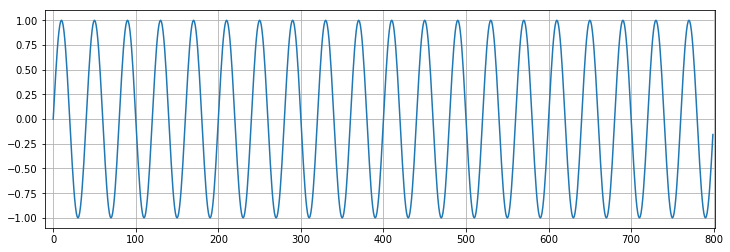

In [10]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(y.numpy())

In [13]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

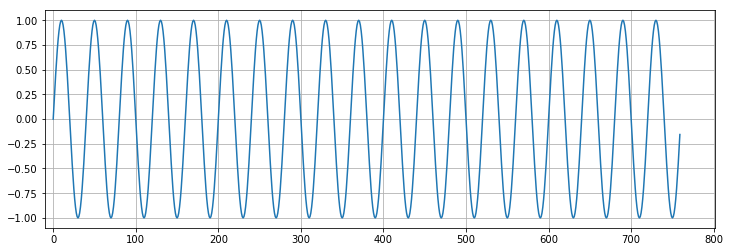

In [14]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(train_set.numpy())

In [15]:
def input_data(seq,ws):
    
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    
    return out

In [16]:
window_size = 40

train_data = input_data(train_set, window_size)

In [17]:
len(train_data)

720

In [18]:
class LSTM(nn.Module):
    
    def __init__(self,input_size = 1, hidden_size = 50, out_size = 1):
        
        super().__init__()
        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(input_size, hidden_size)
        
        self.linear = nn.Linear(hidden_size,out_size)
        
        #(H,C)
        self.hidden = (torch.zeros(1,1,hidden_size), torch.zeros(1,1,hidden_size))
        
    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1),self.hidden)
        
        pred = self.linear(lstm_out.view(len(seq),-1))
        
        return pred[-1]

In [19]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [20]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [21]:
for p in model.parameters():
    print(p.numel())

200
10000
200
200
50
1


In [22]:
train_set[-window_size:].tolist()

[0.0002596856211312115,
 0.15669289231300354,
 0.30926769971847534,
 0.45422035455703735,
 0.5879955291748047,
 0.7072919607162476,
 0.8091720938682556,
 0.8911271691322327,
 0.9511368870735168,
 0.9877293109893799,
 1.0,
 0.9876466989517212,
 0.950973629951477,
 0.8908873796463013,
 0.8088615536689758,
 0.7069184184074402,
 0.5875681638717651,
 0.4537496268749237,
 0.3087652921676636,
 0.15617111325263977,
 -0.0002685945073608309,
 -0.1567016988992691,
 -0.30927619338035583,
 -0.4542282819747925,
 -0.5880027413368225,
 -0.7072982788085938,
 -0.8091772794723511,
 -0.8911312222480774,
 -0.9511396288871765,
 -0.9877306818962097,
 -0.9999999403953552,
 -0.9876452684402466,
 -0.9509708881378174,
 -0.8908833265304565,
 -0.8088563084602356,
 -0.706912100315094,
 -0.5875609517097473,
 -0.4537416994571686,
 -0.3087567985057831,
 -0.1561623215675354]

Epoch 0 Loss: 0.09212873131036758
Loss on test predictions: 0.6071590185165405


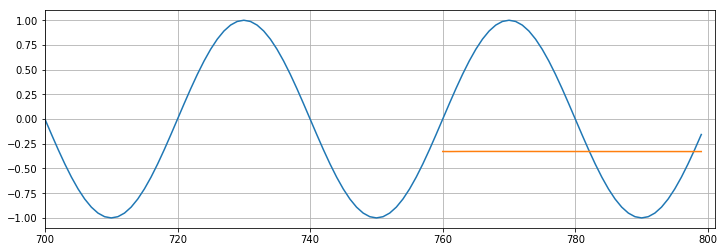

Epoch 1 Loss: 0.06506764143705368
Loss on test predictions: 0.565098762512207


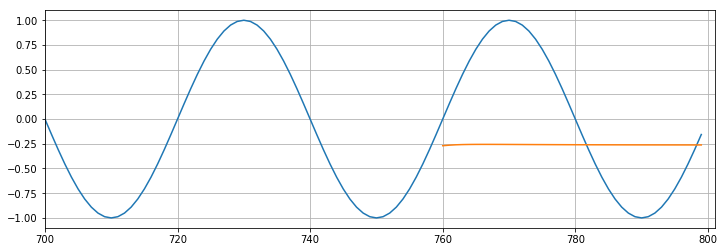

Epoch 2 Loss: 0.04198049008846283
Loss on test predictions: 0.5199716091156006


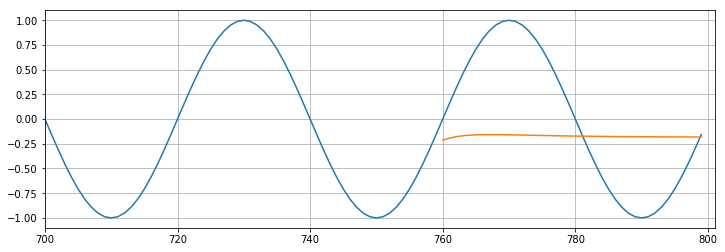

Epoch 3 Loss: 0.017842749133706093
Loss on test predictions: 0.42209964990615845


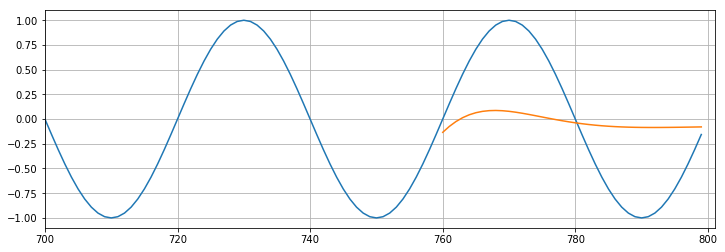

Epoch 4 Loss: 0.002887098118662834
Loss on test predictions: 0.16624097526073456


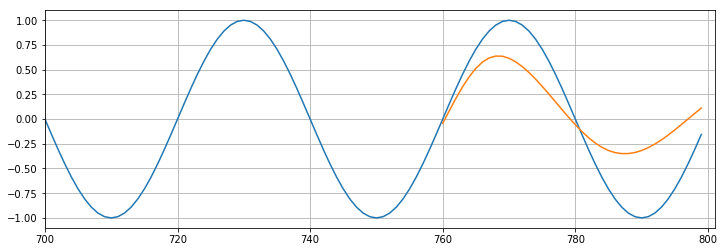

Epoch 5 Loss: 0.00032007365371100605
Loss on test predictions: 0.03055427223443985


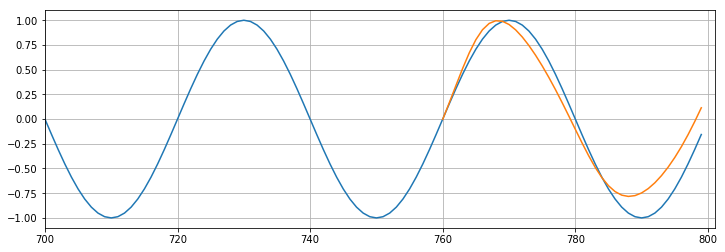

Epoch 6 Loss: 0.00012969138333573937
Loss on test predictions: 0.014990182593464851


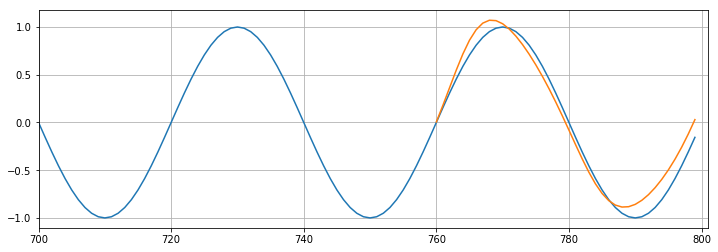

Epoch 7 Loss: 0.00012006700853817165
Loss on test predictions: 0.011856638826429844


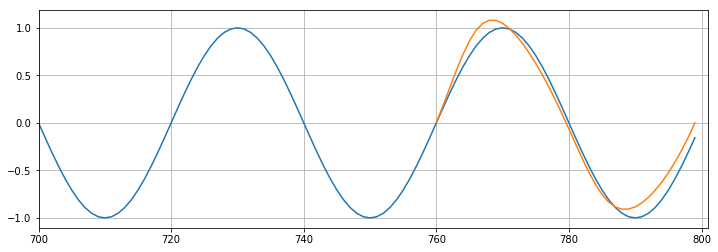

Epoch 8 Loss: 0.0001265565661014989
Loss on test predictions: 0.010163812898099422


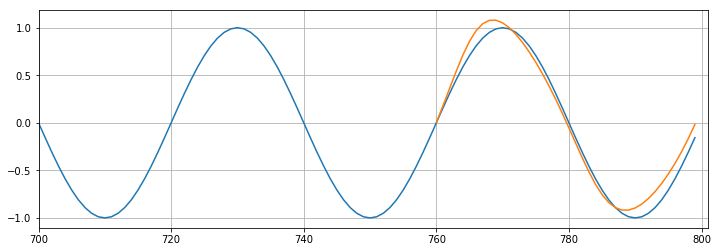

Epoch 9 Loss: 0.0001319547591265291
Loss on test predictions: 0.00889760535210371


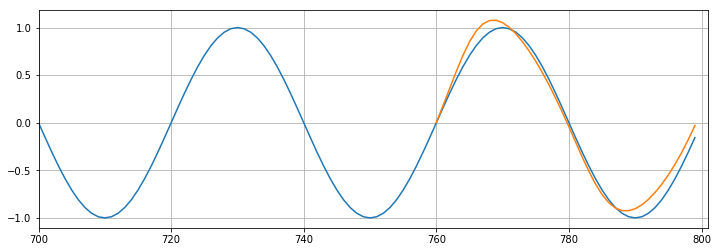

In [25]:
epochs = 10
future = 40

for i in range(epochs):
    
    
    for seq, y_train in train_data:
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        
        loss = criterion(y_pred, y_train)
        
        loss.backward()
        optimizer.step()
        
        
    print(f"Epoch {i} Loss: {loss.item()}")
    
    
    preds = train_set[-window_size:].tolist()
    
    
    for f in range(future):
        
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            
            model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
            
    
    loss = criterion(torch.tensor(preds[-window_size:]),y[760:])
    print(f'Loss on test predictions: {loss}')

    # Plot from point 700 to the end
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760,800),preds[window_size:])
    plt.show()
    

In [26]:
epochs = 15
window_size = 40
future = 40


all_data = input_data(y,window_size)
len(all_data)  # this should equal 800-40

760

In [27]:
import time
start_time = time.time()

for i in range(epochs):
    
    # tuple-unpack the entire set of data
    for seq, y_train in all_data:  
       
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')
    
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.00013453
Epoch:  2 Loss: 0.00013443
Epoch:  3 Loss: 0.00013232
Epoch:  4 Loss: 0.00012880
Epoch:  5 Loss: 0.00012434
Epoch:  6 Loss: 0.00011931
Epoch:  7 Loss: 0.00011398
Epoch:  8 Loss: 0.00010854
Epoch:  9 Loss: 0.00010313
Epoch: 10 Loss: 0.00009784
Epoch: 11 Loss: 0.00009274
Epoch: 12 Loss: 0.00008788
Epoch: 13 Loss: 0.00008326
Epoch: 14 Loss: 0.00007890
Epoch: 15 Loss: 0.00007480

Duration: 177 seconds


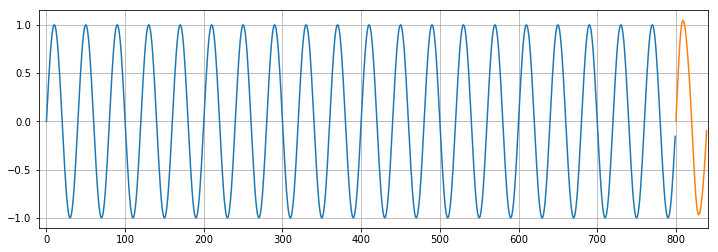

In [28]:
preds = y[-window_size:].tolist()

for i in range(future):  
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        # Reset the hidden parameters
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))  
        preds.append(model(seq).item())

plt.figure(figsize=(12,4))
plt.xlim(-10,841)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800,800+future),preds[window_size:])
plt.show()